In [1]:
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\ADITH SREE RAM\Desktop\research\data\liver.csv', sep = ',')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [4]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<Axes: >

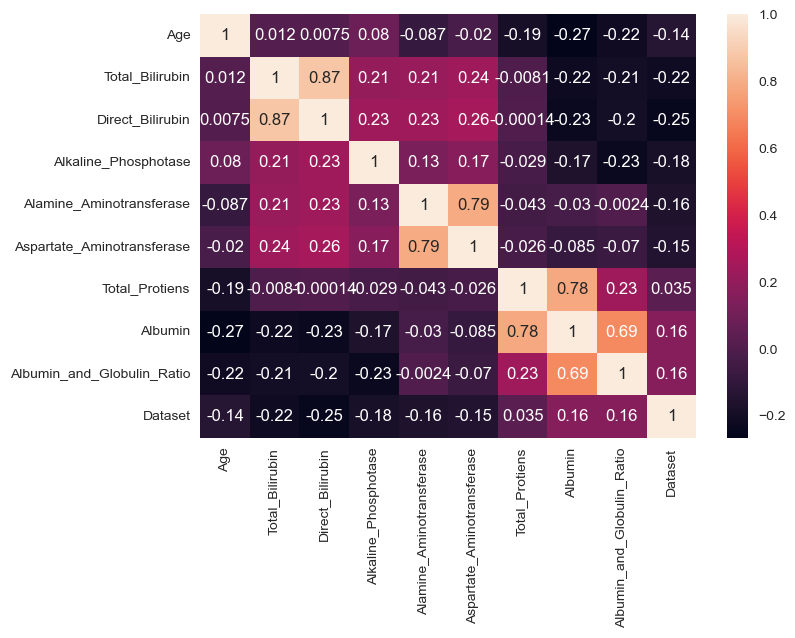

In [5]:
sns.heatmap(df.corr(), annot = True)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = [col for col in df.columns if df[col].dtype == 'object']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [7]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int32  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 47.9 KB


In [9]:
df.Dataset.unique()

array([0, 1], dtype=int64)

In [10]:
df.dropna(inplace = True)

In [11]:
X = df.drop(['Dataset'], axis=1)
y = df['Dataset']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [13]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7901234567901234
Test Accuracy of KNN is 0.6091954022988506 

Confusion Matrix :- 
[[97 25]
 [43  9]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.69      0.80      0.74       122
           1       0.26      0.17      0.21        52

    accuracy                           0.61       174
   macro avg       0.48      0.48      0.47       174
weighted avg       0.56      0.61      0.58       174



In [14]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.5977011494252874 

Confusion Matrix :- 
[[88 34]
 [36 16]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.71      0.72      0.72       122
           1       0.32      0.31      0.31        52

    accuracy                           0.60       174
   macro avg       0.51      0.51      0.51       174
weighted avg       0.59      0.60      0.60       174



In [15]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [16]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 1, 'splitter': 'random'}
0.7382716049382717


In [17]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.7209876543209877
Test Accuracy of Decision Tree Classifier is 0.7011494252873564 

Confusion Matrix :- 
[[122   0]
 [ 52   0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       122
           1       0.00      0.00      0.00        52

    accuracy                           0.70       174
   macro avg       0.35      0.50      0.41       174
weighted avg       0.49      0.70      0.58       174



In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.9950617283950617
Test Accuracy of Random Forest Classifier is 0.6724137931034483 

Confusion Matrix :- 
[[108  14]
 [ 43   9]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.72      0.89      0.79       122
           1       0.39      0.17      0.24        52

    accuracy                           0.67       174
   macro avg       0.55      0.53      0.52       174
weighted avg       0.62      0.67      0.63       174



In [19]:
#Ada Boost
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 0.9827160493827161
Test Accuracy of Ada Boost Classifier is 0.6666666666666666 

Confusion Matrix :- 
[[98 24]
 [34 18]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       122
           1       0.43      0.35      0.38        52

    accuracy                           0.67       174
   macro avg       0.59      0.57      0.58       174
weighted avg       0.65      0.67      0.66       174



In [20]:
#Grading Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9555555555555556
Test Accuracy of Gradient Boosting Classifier is 0.6609195402298851 

Confusion Matrix :- 
[[104  18]
 [ 41  11]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.72      0.85      0.78       122
           1       0.38      0.21      0.27        52

    accuracy                           0.66       174
   macro avg       0.55      0.53      0.53       174
weighted avg       0.62      0.66      0.63       174



In [21]:
#Stocastic Gradient
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.6436781609195402 

Confusion Matrix :- 
[[96 26]
 [36 16]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       122
           1       0.38      0.31      0.34        52

    accuracy                           0.64       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.62      0.64      0.63       174



In [22]:
#XGB
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.6609195402298851 

Confusion Matrix :- 
[[97 25]
 [34 18]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       122
           1       0.42      0.35      0.38        52

    accuracy                           0.66       174
   macro avg       0.58      0.57      0.57       174
weighted avg       0.64      0.66      0.65       174



In [23]:
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(X_train, y_train)

y_pred_GNB = GNBclassifier.predict(X_test)
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print(GNBAcc)

0.46551724137931033


In [24]:
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(X_train, y_train)

y_pred_LR = LRclassifier.predict(X_test)
LRAcc = accuracy_score(y_pred_LR, y_test)
print(LRAcc)

0.7241379310344828


In [25]:
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(X_train, y_train)

y_pred_SVM = SVMclassifier.predict(X_test)
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print(SVMAcc)

0.5057471264367817


In [26]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree', 'Random Forest','Ada Boost',
             'Gradient Boosting', 'XgBoost', 'Logistic Regression', 'Naive Bayes', 'SVM'],
    'Accuracy' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, xgb_acc,LRAcc, GNBAcc, SVMAcc]
})


df1 = models.sort_values(by = 'Accuracy', ascending = False)

In [27]:
df1

,Model,Accuracy
6,Logistic Regression,0.724138
1,Decision Tree,0.701149
2,Random Forest,0.672414
3,Ada Boost,0.666667
4,Gradient Boosting,0.660920
5,XgBoost,0.660920
0,KNN,0.609195
8,SVM,0.505747
7,Naive Bayes,0.465517


Text(0.5, 1.0, 'Model Vs Accuracy for Liver Disease')

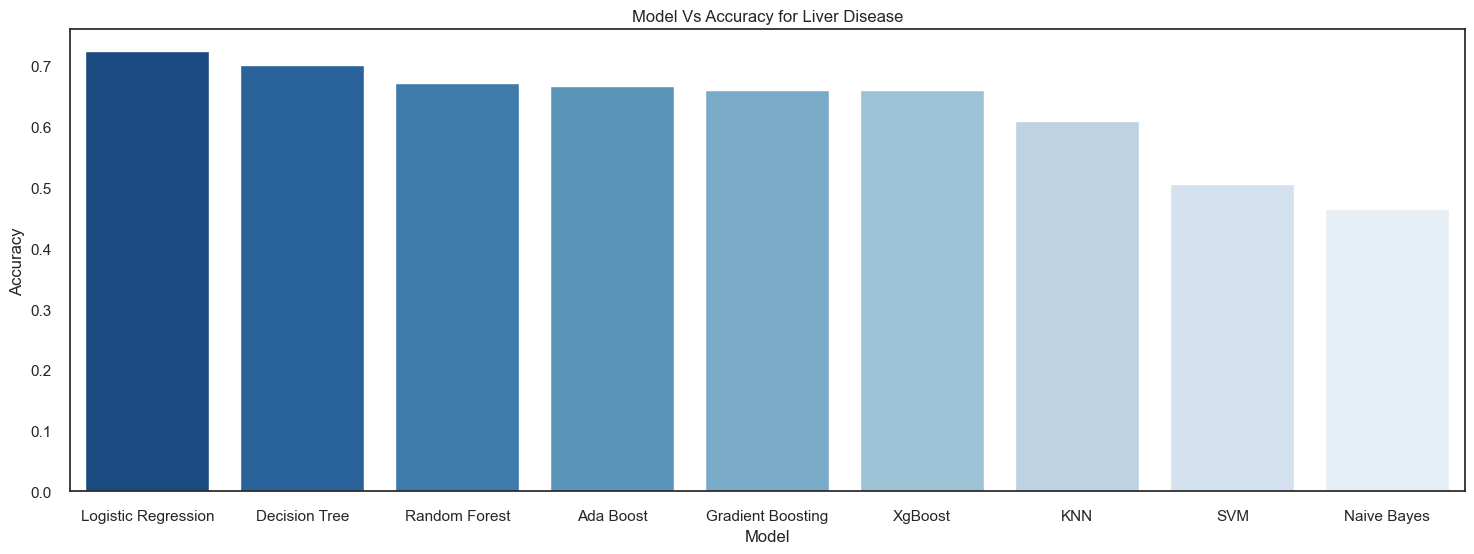

In [34]:
import matplotlib.pyplot as plt
sns.set_theme(style='white')
plt.figure(figsize=(18,6))
sns.barplot(df1, x = 'Model', y = 'Accuracy', palette = 'Blues_r')
plt.title("Model Vs Accuracy for Liver Disease")

In [29]:
import joblib

In [30]:
file = open("liver_model", "wb")
joblib.dump(ada,file)
file.close()